# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./p2_continuous-control/Reacher_Windows_x86_64/Reacher.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

print (env_info.rewards)

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]
[0.0]


In [5]:
#Hyperparameter tuning
######################

BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 256        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-3         # learning rate of the actor 
LR_CRITIC = 1e-3        # learning rate of the critic
WEIGHT_DECAY = 0   # L2 weight decay
EPSILON_DECAY = 0.99995
UPDATE_EVERY = 100
UPDATE_TIMES = 10

Episode 100	Average100 Score: 0.11	Score: 0.00	Epsilon: 1.00000
Episode 200	Average100 Score: 0.10	Score: 0.00	Epsilon: 1.00000
Episode 300	Average100 Score: 0.14	Score: 0.00	Epsilon: 1.00000
Episode 400	Average100 Score: 0.16	Score: 1.17	Epsilon: 1.00000
Episode 500	Average100 Score: 0.18	Score: 0.12	Epsilon: 0.99825
Episode 600	Average100 Score: 0.56	Score: 0.59	Epsilon: 0.70320
Episode 700	Average100 Score: 1.06	Score: 2.09	Epsilon: 0.49536
Episode 800	Average100 Score: 1.67	Score: 1.75	Epsilon: 0.34895
Episode 900	Average100 Score: 3.44	Score: 2.80	Epsilon: 0.245817
Episode 1000	Average100 Score: 4.69	Score: 4.36	Epsilon: 0.17316
Episode 1100	Average100 Score: 5.70	Score: 6.06	Epsilon: 0.121989
Episode 1200	Average100 Score: 6.31	Score: 7.88	Epsilon: 0.085931
Episode 1300	Average100 Score: 6.58	Score: 5.63	Epsilon: 0.060533
Episode 1400	Average100 Score: 8.61	Score: 11.64	Epsilon: 0.04264
Episode 1500	Average100 Score: 8.99	Score: 6.15	Epsilon: 0.030048
Episode 1600	Average100 Scor

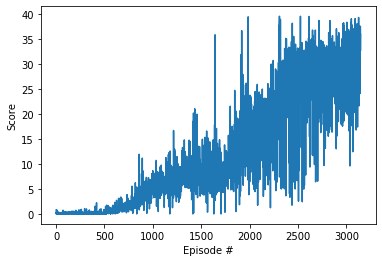

In [6]:
#Training Agent
def ddpg(agent, n_episodes=4000):
    scores_deque = deque(maxlen=100)
    scores_av100_all = []
    all_scores = []
    
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        agent.reset()
        score = 0
        range_counter = 0
        while True:
            range_counter += 1
            action = agent.act(state, add_noise = True)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations        # get next state (for each agent)
            reward = env_info.rewards                         # get reward (for each agent)
            done = env_info.local_done                       # see if episode finished 
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward[0]
            if np.any(done):                                  # exit loop if episode finished
                break
        eps = agent.get_epsilon()
        
        scores_deque.append(score)
        all_scores.append(score)
        score100 = np.mean(scores_deque)
        scores_av100_all.append(score100)
        
        print('\rEpisode {}\tAverage100 Score: {:.2f}\tScore: {:.2f}\tEpsilon: {:.5f}'.format(i_episode, score100, score, eps), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage100 Score: {:.2f}'.format(i_episode, score100))
        if score100 > 30.0:
            print('\rEpisode {}\tAverage100 Score: {:.2f}\tScore: {:.2f}\tEpsilon: {:.5f}'.format(i_episode, score100, score, eps))
            print ('Environment solved! \tAverage100 Score: {:.2f}\tEpisodes: {}'.format(score100,i_episode))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return all_scores, scores_av100_all

James = Agent(state_size, action_size, BUFFER_SIZE, BATCH_SIZE, GAMMA, TAU, LR_ACTOR, LR_CRITIC, WEIGHT_DECAY, EPSILON_DECAY, UPDATE_EVERY, UPDATE_TIMES)
all_scores, scores_av100_all = ddpg(James)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(all_scores)+1), all_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [8]:
env.close()